## Image Classification Using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,Y_train) , (X_test, Y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 503s 3us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
# Reshape y train
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[9]

'truck'

In [17]:
def plot_sample(X,Y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    

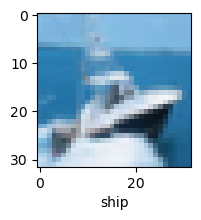

In [19]:
plot_sample(X_train, Y_train, 8)

## Normalize the data

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [24]:
X_train = X_train/255.0
X_test = X_test/255.0

In [26]:
X_train.shape

(50000, 32, 32, 3)

## Build ANN for image classification

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 71ms/step - accuracy: 0.3022 - loss: 1.9321
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4218 - loss: 1.6448
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.4568 - loss: 1.5460
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 76ms/step - accuracy: 0.4744 - loss: 1.4926
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4924 - loss: 1.4491


In [31]:
ann.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.4898 - loss: 1.4450


[1.449705719947815, 0.4846999943256378]

In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.61      0.55      1000
           1       0.58      0.64      0.61      1000
           2       0.40      0.25      0.31      1000
           3       0.32      0.39      0.35      1000
           4       0.51      0.31      0.39      1000
           5       0.44      0.31      0.36      1000
           6       0.39      0.76      0.52      1000
           7       0.62      0.51      0.56      1000
           8       0.57      0.66      0.61      1000
           9       0.67      0.41      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



## We will use CNN to improve the performance

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3791 - loss: 1.6987
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.5966 - loss: 1.1471
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.6524 - loss: 0.9955
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.6856 - loss: 0.9088
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.7106 - loss: 0.8415
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.7282 - loss: 0.7789
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.7465 - loss: 0.7250
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.7691 - loss: 0.6686
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.7780 - loss: 0.6311
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.7882 - loss: 0.6091


In [41]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7037 - loss: 0.9293


[0.944290041923523, 0.6991000175476074]

In [43]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[7.9859974e-04, 1.0901696e-04, 1.7317150e-03, 7.6062071e-01,
        6.5978538e-06, 2.3147643e-01, 2.0620481e-03, 3.0322242e-05,
        3.0046415e-03, 1.6005363e-04],
       [3.3883643e-04, 1.5609630e-02, 2.8170041e-08, 3.1183276e-09,
        1.3465581e-10, 6.7408183e-11, 8.4780261e-10, 4.0006817e-10,
        9.8403370e-01, 1.7910193e-05],
       [4.9083116e-03, 1.0837406e-02, 4.3900497e-04, 3.8246499e-04,
        3.5839319e-05, 7.2709722e-06, 2.3018254e-06, 1.7111361e-04,
        9.8277849e-01, 4.3785846e-04],
       [9.2184985e-01, 1.1734426e-02, 2.0067994e-02, 5.3855160e-04,
        6.3711079e-03, 5.1799681e-05, 9.1984919e-05, 1.0050650e-03,
        3.8247056e-02, 4.2038733e-05],
       [7.8983044e-07, 2.8740283e-04, 2.9974051e-03, 9.0585724e-02,
        2.8000036e-01, 1.1622351e-02, 6.1437720e-01, 5.3904787e-06,
        1.2273833e-04, 6.4655609e-07]], dtype=float32)

In [47]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [51]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: only integer scalar arrays can be converted to a scalar index

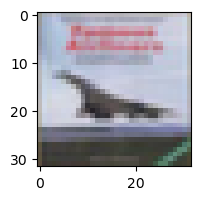

In [55]:
plot_sample(X_test, Y_test,3)